# Linear Regression


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read dataset

In [3]:
salaries = pd.read_csv('Salary_Data_Linear_Regression.csv')

## 2. Explore dataset

In [4]:
salaries.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Question: regression problem or classification problem??
---> Regression problem

In [5]:
# How many datapoint we have?
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


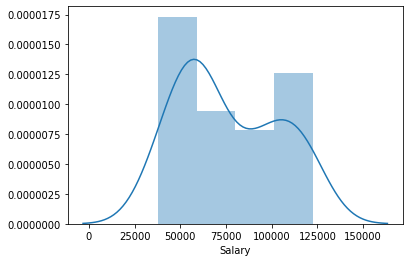

In [6]:
## Distribution of salary
sns.distplot(salaries['Salary']);

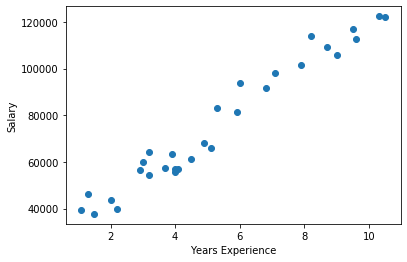

In [7]:
plt.scatter(salaries['YearsExperience'], salaries['Salary']);
plt.xlabel('Years Experience')
plt.ylabel('Salary');

## Years Experience is correlated with Salary so that we can use Years Experience to predict Salary

## 3. Split data into train and test set

In [7]:
print(type(salaries[['YearsExperience']]))
print(type(salaries['YearsExperience']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
from sklearn.model_selection import train_test_split
X = salaries[['YearsExperience']]
y = salaries['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

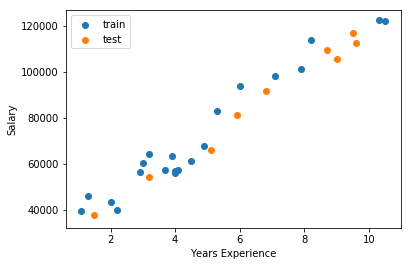

In [9]:
# Plot train set
plt.scatter(x=X_train, y=y_train, label='train')
# Plot test set
plt.scatter(x=X_test, y=y_test, label='test')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend();

## 4. Create model

In [10]:
from sklearn.linear_model import LinearRegression
# Create linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

$Salary=b_0+b_1*YearsExperience$

In [11]:
# b1
lr.coef_

array([9577.17174975])

In [12]:
# b0
lr.intercept_

25975.814659541138

In [13]:
# Use trained model to make prediction
predict_test = lr.predict(X=X_test)

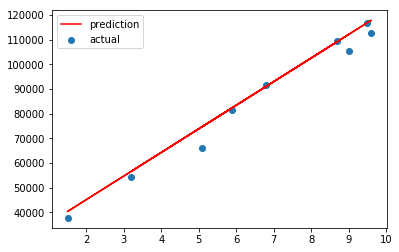

In [14]:
# plot our prediction value
plt.scatter(X_test, y_test, label='actual')
plt.plot(X_test, predict_test, label='prediction', color='red')
plt.legend();

## 5. Evaluate model

In [15]:
# calculate MSE
import math
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict_test))
# question here ?? calculate RMSE
print(math.sqrt(mean_squared_error(y_test, predict_test)))

17978409.49734413
4240.095458517901


In [16]:
from sklearn.metrics import r2_score

r2_score(predict_test, y_test)

0.9740304326052086

## 6. Extra Polynomial Regression

In [17]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 300, n_features=1, noise=8, bias=2)
y2 = y**2

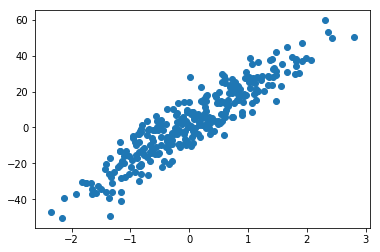

In [18]:
plt.scatter(X, y)

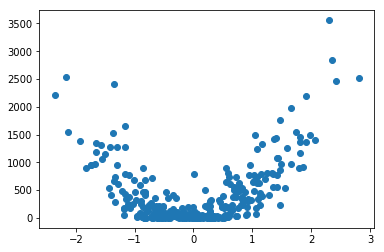

In [19]:
plt.scatter(X, y2)

Text(0.5, 1.0, 'Linear Model, Polynomial Degree = 1')

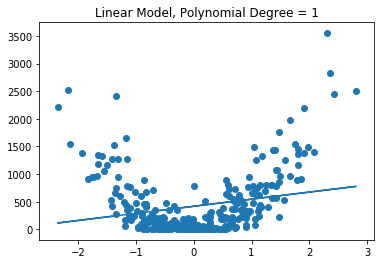

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y2)
pred = model.predict(X)
plt.plot(X, pred)
plt.scatter(X, y2)
plt.title("Linear Model, Polynomial Degree = 1")

In [21]:
r2_score(pred, y2)

-19.08227604472913

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly_model = PolynomialFeatures(degree=2)

Text(0.5, 1.0, 'Polynomial Degree = 2')

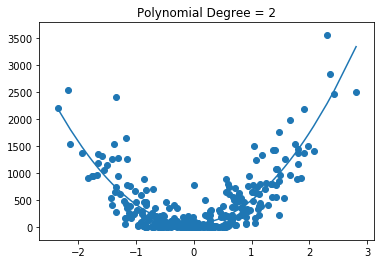

In [24]:
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree = 2)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y2)

pred = poly_model.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred))) # sort values for plotting
plt.plot(new_X, new_y)
plt.scatter(X,y2)
plt.title("Polynomial Degree = 2")

In [25]:
r2_score(pred, y2)

0.6256964495803985